# Práctica 1.1

### Limpieza, Transformación y Reducción

In [2]:
import numpy as np
import pandas as pd

# Limpieza

## Handling Missing Values

### Delete Row

In [3]:
df1 = pd.read_csv('data/diabetes_null.csv')
print ("Dimensiones", df1.shape)
print ("valores nulos por variable")
print (df1.isnull().sum().sort_values(ascending=False))

Dimensiones (768, 9)
valores nulos por variable
Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64


In [4]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,11.0,76.0,48.0,18.0,32.9,0.171,63,0
764,2,122.0,7.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,3,0
766,1,126.0,6.0,NaN,NaN,3.1,0.349,47,1


In [5]:
df_no_missing = df1.dropna(axis=0)
print ("Nuevas dimensiones",df_no_missing.shape)
print ("valores nulos por variable")
print (df_no_missing.isnull().sum().sort_values(ascending=False))

Nuevas dimensiones (392, 9)
valores nulos por variable
Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64


In [6]:
df_no_missing

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,5.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,7.0,45.0,543.0,3.5,0.158,53,1
13,1,189.0,6.0,23.0,846.0,3.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,51.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,11.0,36.5,1.570,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,11.0,76.0,48.0,18.0,32.9,0.171,63,0


### Fill with mean

In [6]:
from sklearn.preprocessing import Imputer

# Data from excel
df1 = pd.read_csv('data/diabetes_null.csv')

#Imputer to replace Null with mean
imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
imp.fit(df1)
df1 = pd.DataFrame(data=imp.transform(df1), columns=df1.columns)

#print
print ("valores nulos por variable")
print (df1.isnull().sum().sort_values(ascending=False))
print (df1.shape)

valores nulos por variable
Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64
(768, 9)


C:\Users\gallastegi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,105.659898,33.6,0.627,5.0,1.0
1,1.0,85.0,66.0,29.000000,105.659898,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.876155,105.659898,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,4.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,11.0,76.0,48.000000,18.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,7.0,27.000000,105.659898,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,3.0,0.0
766,1.0,126.0,6.0,25.876155,105.659898,3.1,0.349,47.0,1.0


### Fill with median

In [9]:
from sklearn.preprocessing import Imputer

# Data from excel
df1 = pd.read_csv('data/diabetes_null.csv')

#Imputer to replace Null with mean
imp = Imputer(missing_values = 'NaN', strategy='median', axis=0)
imp.fit(df1)
df1 = pd.DataFrame(data=imp.transform(df1), columns=df1.columns)

#print
print ("valores nulos por variable")
print (df1.isnull().sum().sort_values(ascending=False))
print (df1.shape)

valores nulos por variable
Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64
(768, 9)


C:\Users\gallastegi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,71.0,33.6,0.627,5.0,1.0
1,1.0,85.0,66.0,29.0,71.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,27.0,71.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,4.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,11.0,76.0,48.0,18.0,32.9,0.171,63.0,0.0
764,2.0,122.0,7.0,27.0,71.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,3.0,0.0
766,1.0,126.0,6.0,27.0,71.0,3.1,0.349,47.0,1.0


## Handling Noicy Data

### Function to find outliers

In [11]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values


### Outliers Found in each column

In [12]:
glucose_indices, glucose_values = find_outliers_tukey(df1['Glucose'])
print("Outliers for Glucose")
print(np.sort(glucose_values))

print("Outliers for Pregnancies")
pr_indices, pr_values = find_outliers_tukey(df1['Pregnancies'])
print(np.sort(pr_values))


print("Outliers for BloodPressure")
blood_indices, blood_values = find_outliers_tukey(df1['BloodPressure'])
print(np.sort(blood_values))


print("Outliers for SkinThickness")
#TODO

print("Outliers for Insulin")
#TODO

print("Outliers for BMI")
#TODO

print("Outliers for DiabetesPedigreeFunction")
#TODO

print("Outliers for Age")
#TODO


Outliers for Glucose
[]
Outliers for Pregnancies
[14. 14. 15. 17.]
Outliers for BloodPressure
[122.]
Outliers for SkinThickness
Outliers for Insulin
Outliers for BMI
Outliers for DiabetesPedigreeFunction
Outliers for Age


## Deleting Row

In [13]:
print (df1.shape)
df_del = df1.drop(pr_indices)
print(df_del.head(5))
print (df_del.shape)

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     71.0  33.6   
1          1.0     85.0           66.0           29.0     71.0  26.6   
2          8.0    183.0           64.0           27.0     71.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  
(764, 9)


## Replace with min or max

In [14]:
min_in = np.min(df_del['Insulin'])
print (min_in)
print (df_del['Insulin'].mean())
df_del['Insulin'] = np.where(df_del['Insulin'] > 168, min_in, df_del['Insulin'])
print(df_del.head(10))
print (df_del['Insulin'].mean())



1.0
88.74869109947645
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     71.0  33.6   
1          1.0     85.0           66.0           29.0     71.0  26.6   
2          8.0    183.0           64.0           27.0     71.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            4.0           35.0    168.0  43.1   
5          5.0    116.0           74.0           27.0     71.0  25.6   
6          3.0     78.0            5.0           32.0     88.0  31.0   
7         10.0    115.0           66.0           27.0     71.0  35.3   
8          2.0    197.0            7.0           45.0      1.0   3.5   
9          8.0    125.0           96.0           27.0     71.0  32.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3    

### Replace with max where BloodPressure > 96

In [15]:
max_BP = np.max(df_del['BloodPressure'])
print (max_BP)
print (df_del['BloodPressure'].mean())
df_del['BloodPressure'] = np.where(df_del['BloodPressure'] > 96, max_BP, df_del['BloodPressure'])
print(df_del.head(10))
print (df_del['BloodPressure'].mean())

122.0
56.18324607329843
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     71.0  33.6   
1          1.0     85.0           66.0           29.0     71.0  26.6   
2          8.0    183.0           64.0           27.0     71.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            4.0           35.0    168.0  43.1   
5          5.0    116.0           74.0           27.0     71.0  25.6   
6          3.0     78.0            5.0           32.0     88.0  31.0   
7         10.0    115.0           66.0           27.0     71.0  35.3   
8          2.0    197.0            7.0           45.0      1.0   3.5   
9          8.0    125.0           96.0           27.0     71.0  32.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3  

# Visualization

## Histogram

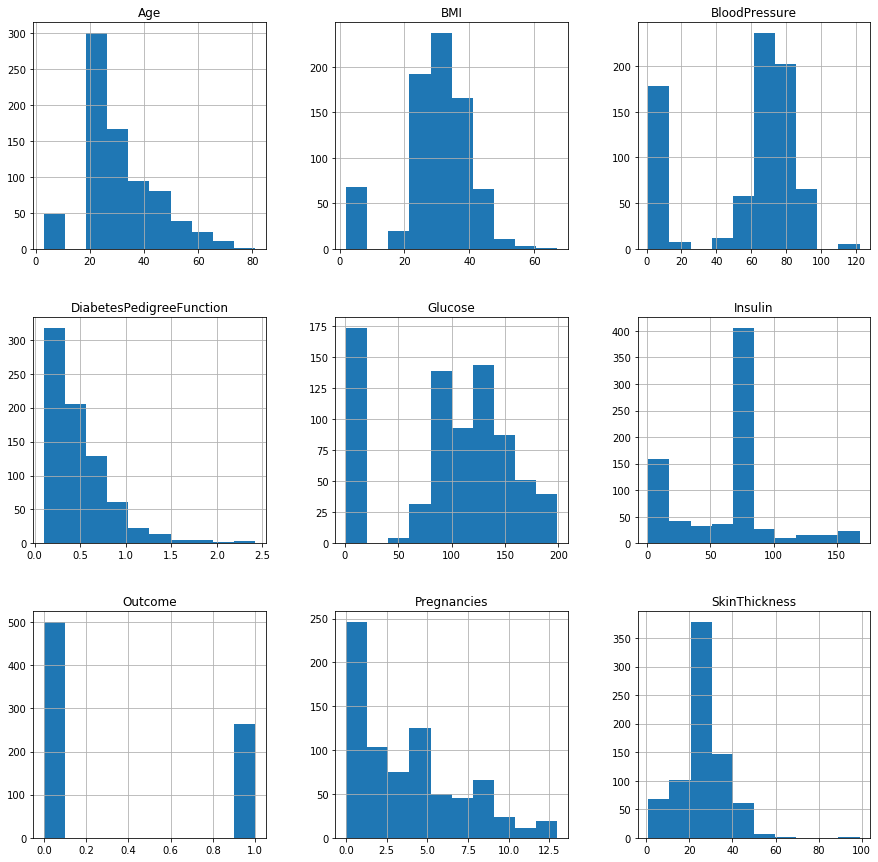

In [17]:
import matplotlib.pyplot as plt
df_del.hist(figsize=(15,15))
plt.show()

## Density Plot

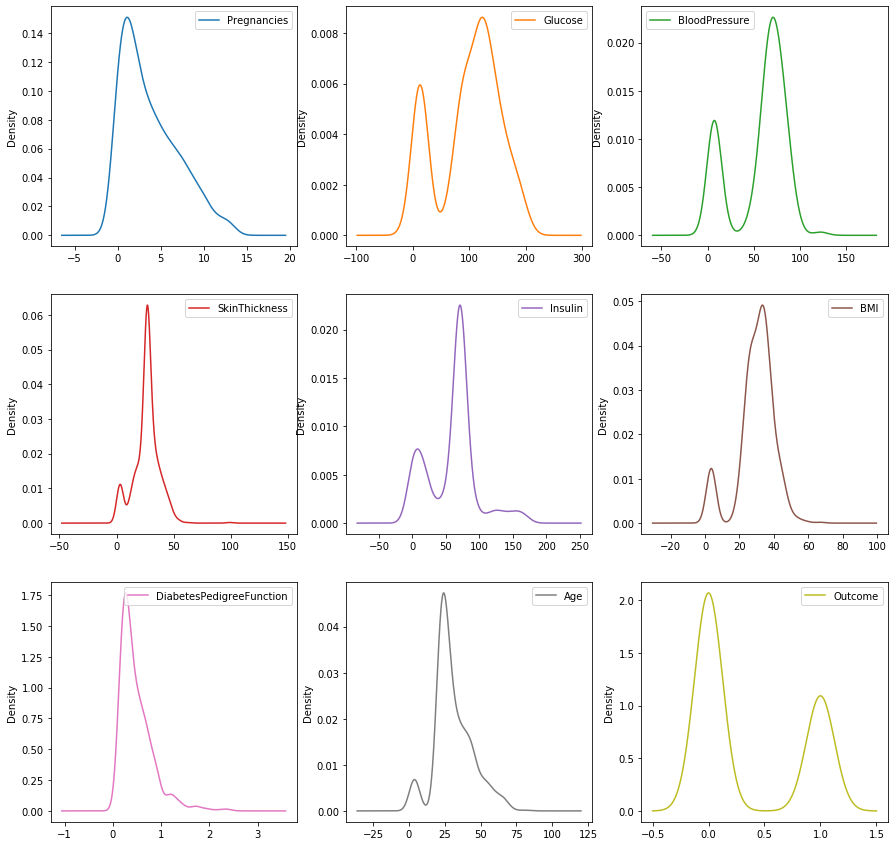

In [18]:
df_del.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))
plt.show()

## Box Plot

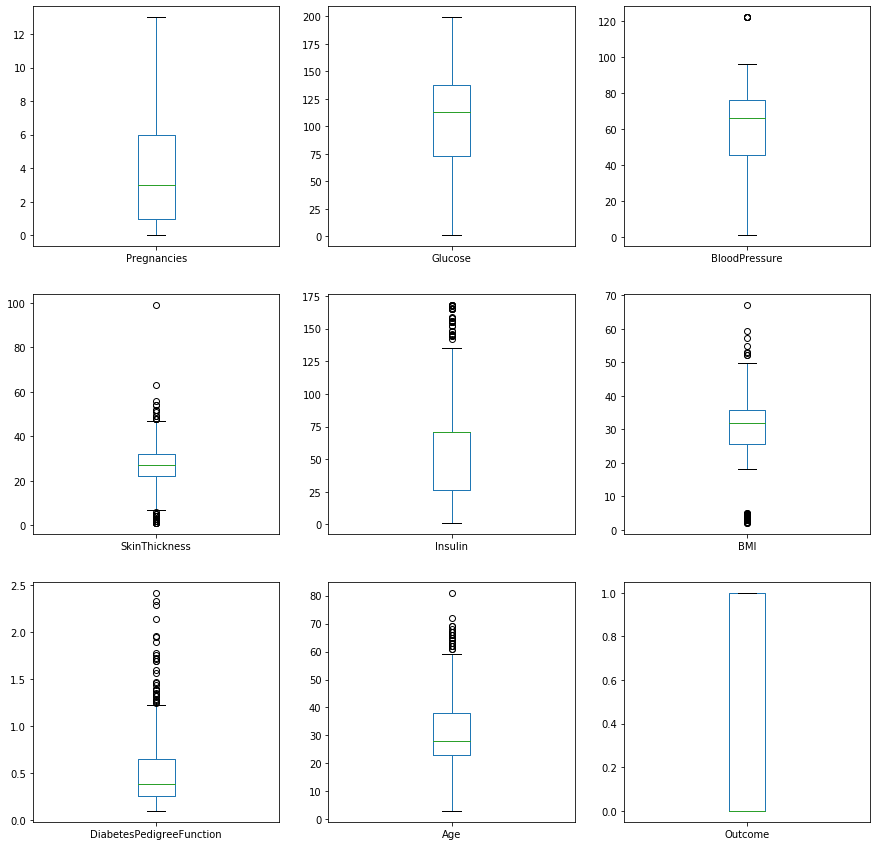

In [19]:
df_del.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
plt.show()


## Correlation Matrix

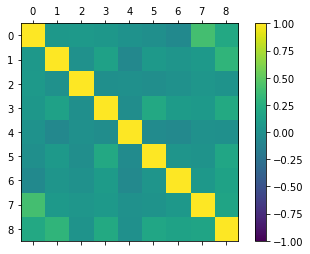

In [20]:
#Correlatión de Pearson
cor = df_del.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax =1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

## Scatter Plot

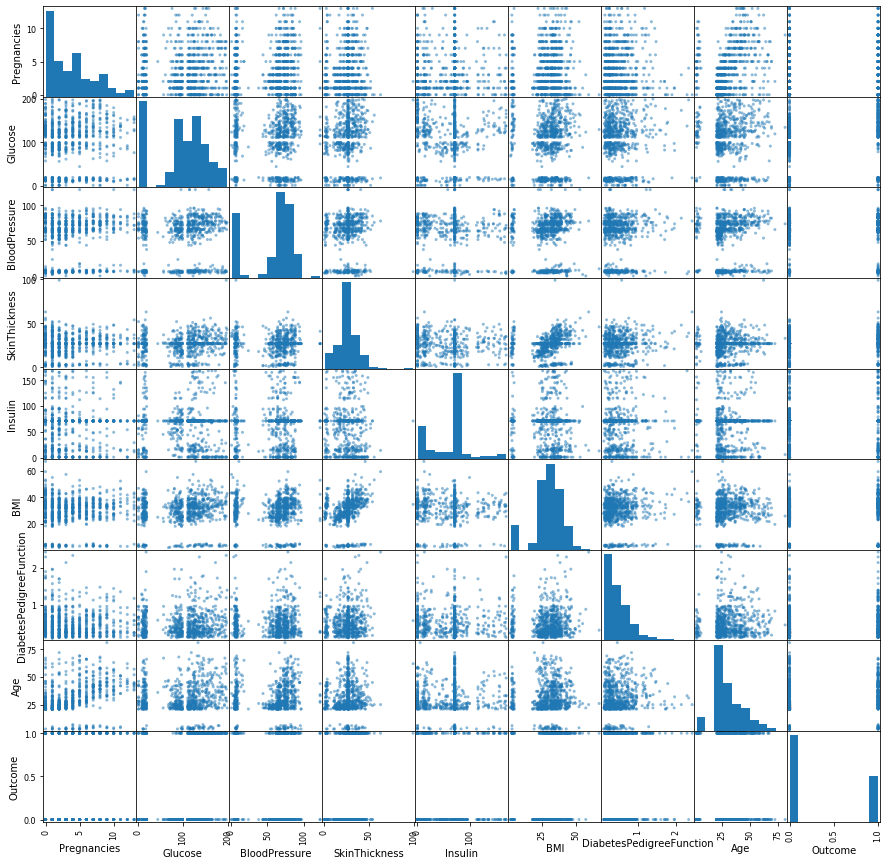

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_del, figsize=(15,15))
plt.show()